# What is Linear Regression?

Linear regression is like drawing the **best straight line** through a bunch of scattered points. Imagine you have data about house sizes and their prices - linear regression helps you find the line that best shows the relationship between size and price.

### The Math Behind It (Don't Worry, It's Simple!)

The equation of a straight line is: **y = mx + b**

In machine learning, we write it as: **y = wx + b**

Where:
- **y** = what we want to predict (house price)
- **x** = what we know (house size) 
- **w** = weight/slope (how much price increases per square foot)
- **b** = bias/intercept (base price when size is 0)

To keep the understanding simple, we will generate some synthetic data, instead of working with big datasets right away. Once a little familiar, we will integrate datasets like Boston housing, or salary datasets from Kaggle.

Also, instead of using inbuilt LR library, we will write it from scratch to build understanding.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let us create some fake housing data

In [4]:
house_sizes = np.array([1000, 1500, 2000, 2500, 3000, 3500, 4000])  # Square feet
house_prices = np.array([200000, 300000, 400000, 500000, 600000, 700000, 800000])  # Price in dollars

Let us visualize our data to gain better insights

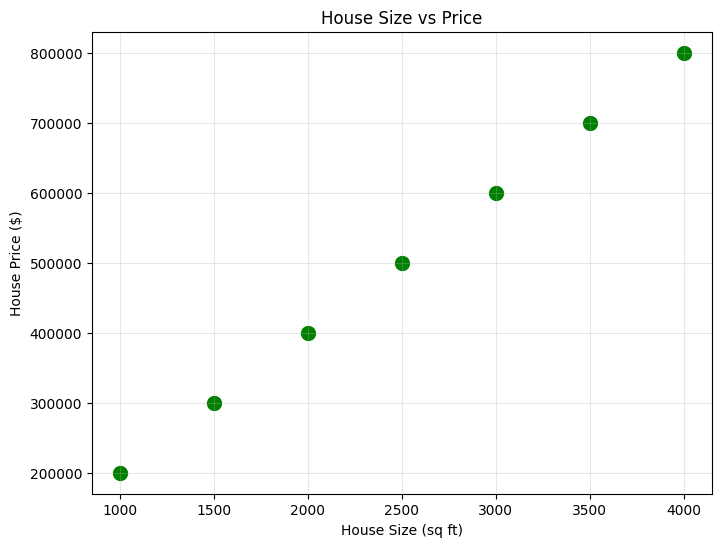

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(house_sizes, house_prices, color='green', s=100)
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.title('House Size vs Price')
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
print("Our data: ")
for size, price in zip(house_sizes, house_prices):
    print(f"Size: {size} sq ft, Price: ${price}")

Our data: 
Size: 1000 sq ft, Price: $200000
Size: 1500 sq ft, Price: $300000
Size: 2000 sq ft, Price: $400000
Size: 2500 sq ft, Price: $500000
Size: 3000 sq ft, Price: $600000
Size: 3500 sq ft, Price: $700000
Size: 4000 sq ft, Price: $800000


We will design a simple LR class now.

In [11]:
class LinearRegression:
    def __init__(self):
        self.weight = None
        self.bias = None

    def fit(self, X, y):
        """
        Find the best line through our data points.
        
        We use a simple mathematical formula:
        weight = (mean(x*y) - mean(x)*mean(y)) / (mean(x*x) - mean(x)*mean(x))
        -- This is basically the covariance of x and y divided by variance of x
        bias = mean(y) - weight * mean(x)
        """

        mean_x = np.mean(X)
        mean_y = np.mean(y)

        numerator = np.mean(X*y) - mean_x * mean_y
        denominator = np.mean(X * X) - mean_x * mean_x
        self.weight = numerator / denominator

        self.bias = mean_y - self.weight * mean_x

        print("Yay, model trained")
        print(f"Weight (slope): {self.weight}")
        print(f"Intercept (bias): {self.bias}")
        print(f"Equation: y = {self.weight:.2f}x + {self.bias:.2f}")    
    
    def predict(self, X):
        """Make predictions using our line equation"""
        return self.weight * X + self.bias



Let us train our model now

In [12]:
model = LinearRegression()
model.fit(house_sizes, house_prices)

Yay, model trained
Weight (slope): 200.0
Intercept (bias): 0.0
Equation: y = 200.00x + 0.00


In [13]:
predictions = model.predict(house_sizes)

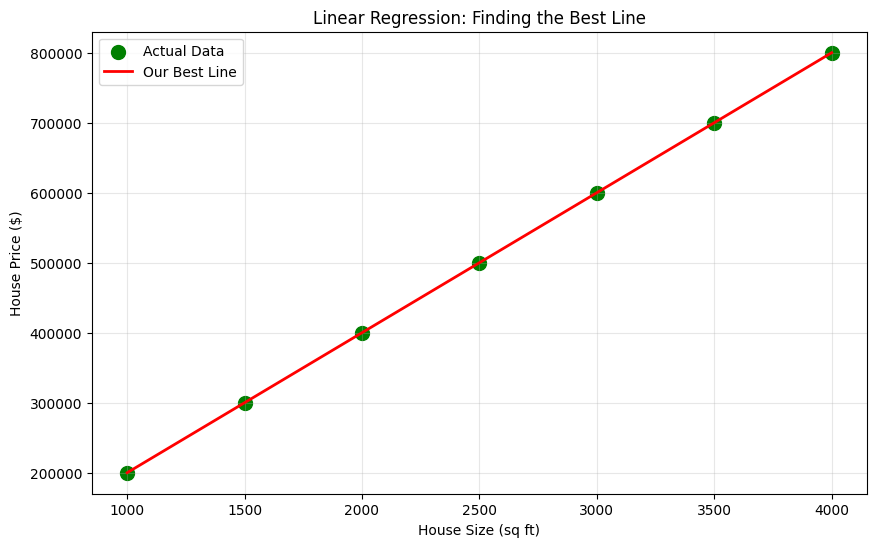

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(house_sizes, house_prices, color='green', s=100, label='Actual Data')
plt.plot(house_sizes, predictions, color='red', linewidth=2, label='Our Best Line')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.title('Linear Regression: Finding the Best Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Now, let us predict a new house price

In [15]:
new_house_size = 2750
predicted_price = model.predict(new_house_size)
print(f"A {new_house_size} sq ft would cost {predicted_price}")

A 2750 sq ft would cost 550000.0


### How Good is Our Model?

We measure this using R² Score (R-squared):

- 1.0 = Perfect! Our line goes through every point
- 0.0 = Terrible! We're just guessing the average
- Negative = Worse than guessing!

In [16]:
def calculate_r2(actual, predicted):
    """
    R² = 1 - (Sum of squared errors / Total sum of squares)
    
    Think of it as: "How much better are we than just guessing the average?"
    """
    ss_res = np.sum((actual-predicted) ** 2)
    ss_total = np.sum((actual - np.mean(actual)) ** 2)

    r2 = 1 -(ss_res / ss_total)
    return r2

In [17]:
r2_score = calculate_r2(house_prices, predictions)
print(f"R² Score: {r2_score:.4f}")

if r2_score > 0.9:
    print("Excellent! Our model is very good!")
elif r2_score > 0.7:
    print("Good! Our model is decent!")
else:
    print("Okay, but we can do better...")

R² Score: 1.0000
Excellent! Our model is very good!


### Understanding Errors (Residuals)
Residuals are the differences between actual values and our predictions. They help us understand where our model makes mistakes.

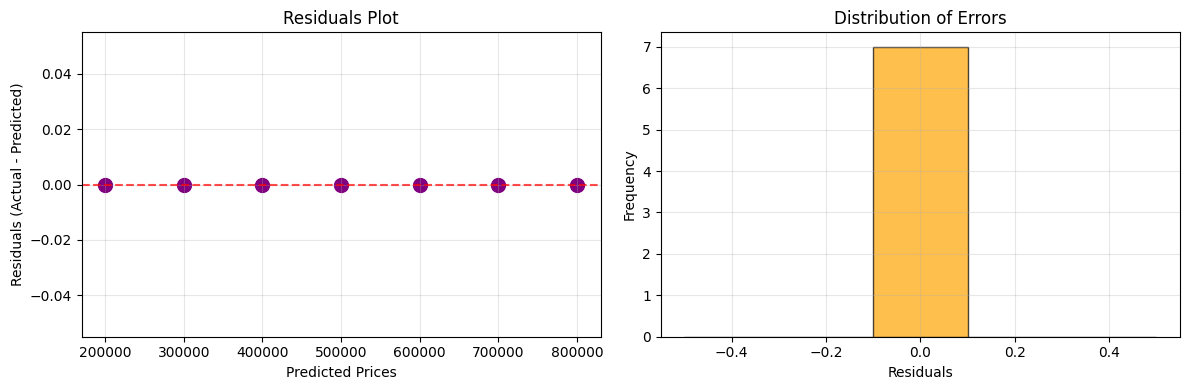

In [18]:
residuals = house_prices - predictions

# Plot residuals
plt.figure(figsize=(12, 4))

# Residuals plot
plt.subplot(1, 2, 1)
plt.scatter(predictions, residuals, color='purple', s=100)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

# Residuals histogram
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=5, color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Since the data was fake, we got 0 errors, let us try with some randomly generated points

In [20]:
np.random.seed(42)

size = np.random.normal(2500, 800, 50)
prices = 150 * size + 50000 + np.random.normal(0, 30000, 50)

size = size[size > 0]
prices = prices[prices > 0]

model = LinearRegression()
model.fit(size, prices)

Yay, model trained
Weight (slope): 153.86533670478025
Intercept (bias): 41567.31040165346
Equation: y = 153.87x + 41567.31


In [23]:
predictions = model.predict(size)
r2 = calculate_r2(prices, predictions)

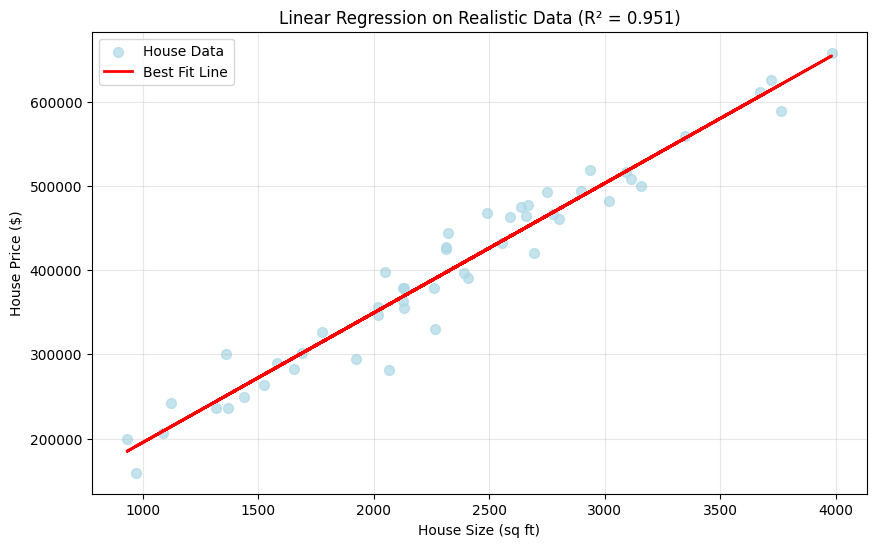

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(size, prices, color='lightblue', alpha=0.7, s=50, label='House Data')
plt.plot(size, predictions, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.title(f'Linear Regression on Realistic Data (R² = {r2:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [30]:
print(f"R² Score: {r2:.4f}")

R² Score: 0.9511


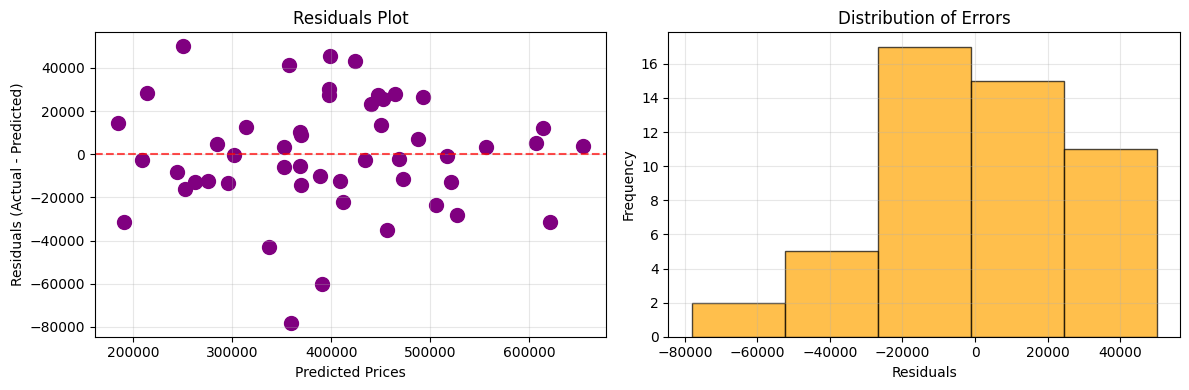

In [28]:
residuals = prices - predictions

# Plot residuals
plt.figure(figsize=(12, 4))

# Residuals plot
plt.subplot(1, 2, 1)
plt.scatter(predictions, residuals, color='purple', s=100)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

# Residuals histogram
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=5, color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Key Takeaways 

- Linear regression finds the best straight line through your data points
- The equation is simple: y = weight × x + bias
- R² score tells you how good your line is (closer to 1.0 = better)
- Residuals show you where your model makes mistakes
- Real data is messy - perfect lines are rare!